### Given an housing data for King's Court London identify the clusters using Elbow plot and determine the silhoutte score
        - File Location: https://github.com/CoderFundamentals/python/blob/master/k-mean/data/kc_housingdata.csv
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot

In [2]:
Housing_data = pd.read_csv("../data/kc_housingdata.csv")
Housing_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
#Find the data that is numeric and is independent in nature
data_num = Housing_data[['price', 'bedrooms', 'bathrooms','sqft_living']]
data_num.isnull().any()

price          False
bedrooms       False
bathrooms      False
sqft_living    False
dtype: bool

In [4]:
# Apply z scaler on the data frame to scale the values
from sklearn.preprocessing import MinMaxScaler
data_num[['price', 'bedrooms', 'bathrooms','sqft_living']] = MinMaxScaler().fit_transform(data_num[['price', 'bedrooms', 'bathrooms','sqft_living']])
data_num.head()

<ipython-input-4-dcb9913162a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num[['price', 'bedrooms', 'bathrooms','sqft_living']] = MinMaxScaler().fit_transform(data_num[['price', 'bedrooms', 'bathrooms','sqft_living']])
/Users/agastya/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,price,bedrooms,bathrooms,sqft_living
0,0.019266,0.090909,0.12500,0.067170
1,0.060721,0.090909,0.28125,0.172075
2,0.013770,0.060606,0.12500,0.036226
3,0.069377,0.121212,0.37500,0.126038
4,0.057049,0.090909,0.25000,0.104906


In [5]:
import sklearn.cluster as cluster
k_means = cluster.KMeans(n_clusters=3, init="k-means++")
k_means = k_means.fit(data_num)

In [6]:
k_means.labels_

array([0, 2, 0, ..., 0, 2, 0], dtype=int32)

In [7]:
k_means.cluster_centers_

array([[0.0398471 , 0.08664291, 0.17362659, 0.08347628],
       [0.14793518, 0.13086441, 0.43435432, 0.27170817],
       [0.06109768, 0.10911742, 0.30474421, 0.15021357]])

In [8]:
#draw the elbow plot
from scipy.spatial.distance import cdist
r = range(1,20)
wss = []
for k in r:
    kmeans = cluster.KMeans(n_clusters=k, init="k-means++")
    kmeans = kmeans.fit(data_num)
    wss.append(sum(np.min(cdist(data_num, kmeans.cluster_centers_, 'euclidean'), axis=1))/data_num.shape[0])

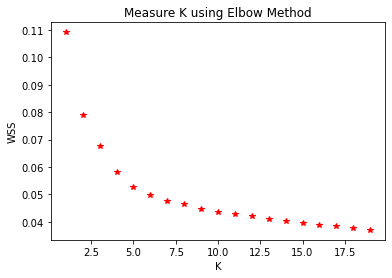

In [10]:
pyplot.plot(r,wss,'r*')
pyplot.xlabel("K")
pyplot.ylabel("WSS")
pyplot.title("Measure K using Elbow Method")
pyplot.show()

### From the above plot it is clear that our WSS becames flat ranging 7 till 15.To exactly measure the no of clusters we can use the silhoutte score method

In [11]:
import sklearn.metrics as metrics

In [22]:
 for i in range(7,15):
    kmean_label = cluster.KMeans(n_clusters=i,random_state=200).fit(data_num).labels_
    silhoutte_score = metrics.silhouette_score(data_num,kmean_label,sample_size=10000, random_state=100,metric ='euclidean')
    print("silhoutte score for k: {cluster} is {silhoutte_score}".
          format(cluster = i, silhoutte_score = silhoutte_score ))

silhoutte score for k: 7 is 0.32787583462840014
silhoutte score for k: 8 is 0.32986665799909903
silhoutte score for k: 9 is 0.3055876865644176
silhoutte score for k: 10 is 0.30576883441742536
silhoutte score for k: 11 is 0.307293245649651
silhoutte score for k: 12 is 0.2808496194178666
silhoutte score for k: 13 is 0.26583134675502956
silhoutte score for k: 14 is 0.2823874018428362


### From above it is clear that silhoutte score for cluster 8 is max.Hence can be considered ideal